# Road to ANN

## Logistic Regression Recap (Binary Classification)



**Logistic Regression** is a linear model used for **binary classification**. It estimates the probability that a data point belongs to class 1 using the **sigmoid function**:

$$
P(y = 1 \mid \mathbf{x}) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}
$$

- Outputs a value between **0 and 1**
- Thresholded at 0.5 to make class predictions
- Trained using **log-loss (cross-entropy)**

> Logistic Regression is actually a very simple **1-layer neural network** with sigmoid activation.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Binary classification data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)


# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



## From Binary to Multiclass: Softmax Logistic Regression



To handle **multiclass classification**, we extend logistic regression using the **Softmax function**, which converts a vector of raw scores (logits) into **class probabilities**.

### Softmax Formula

Given a vector of scores:

$$
\mathbf{z} = [z_1, z_2, \dots, z_K]
$$

The softmax for class $k$ is:

$$
P(y = k \mid \mathbf{z}) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

- Converts logits into **probabilities summing to 1**
- Ensures the model picks the class with **highest probability**
- Used in **multinomial logistic regression** and **ANNs**

---

### Multiclass Logistic Regression — Manual Example (Mathematical)

Let's walk through a complete example of how multiclass logistic regression works step by step.

---

#### Dataset

Suppose we have 1 data sample `x` with **2 features**, and we want to classify it into one of **3 classes**.

Let:

- Input sample:  
  $$
  \mathbf{x} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}
  $$

- Weight matrix (1 row per class):  
  $$
  \mathbf{W} =
  \begin{bmatrix}
  1 & 0 \\
  -1 & 1 \\
  0.5 & 1
  \end{bmatrix}
  $$

- Bias vector:  
  $$
  \mathbf{b} = \begin{bmatrix} 0 \\ 0.5 \\ -1 \end{bmatrix}
  $$

---

#### Step 1: Compute Logits

We calculate the **logit vector** `z` as:

$$
\mathbf{z} = \mathbf{W} \cdot \mathbf{x} + \mathbf{b}
$$

So:

$$
\begin{aligned}
z_1 &= 1 \cdot 2 + 0 \cdot 1 + 0 = 2 \\
z_2 &= -1 \cdot 2 + 1 \cdot 1 + 0.5 = -2 + 1 + 0.5 = -0.5 \\
z_3 &= 0.5 \cdot 2 + 1 \cdot 1 - 1 = 1 + 1 - 1 = 1
\end{aligned}
$$

Thus:

$$
\mathbf{z} = \begin{bmatrix} 2 \\ -0.5 \\ 1 \end{bmatrix}
$$

---

#### Step 2: Apply Softmax

Softmax turns the logits into probabilities:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

So:

$$
\begin{aligned}
e^{z_1} &= e^2 ≈ 7.389 \\
e^{z_2} &= e^{-0.5} ≈ 0.606 \\
e^{z_3} &= e^1 ≈ 2.718 \\
\text{Sum} &= 7.389 + 0.606 + 2.718 ≈ 10.713
\end{aligned}
$$

Final probabilities:

$$
\begin{aligned}
P(y=1) &= \frac{7.389}{10.713} ≈ 0.69 \\
P(y=2) &= \frac{0.606}{10.713} ≈ 0.056 \\
P(y=3) &= \frac{2.718}{10.713} ≈ 0.254
\end{aligned}
$$

---

#### Prediction

The predicted class is the one with the **highest probability**:

$$
\hat{y} = \arg\max \text{softmax}(z) = \text{Class } 1
$$

---

This shows how input features are transformed linearly, then passed through the softmax to output class probabilities.


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# Load multiclass dataset
X, y = load_iris(return_X_y=True)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiclass logistic regression using softmax
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## From Logistic Regression to Perceptron



Previously, we learned that Logistic Regression models use a **weighted sum of inputs + bias**, followed by an **activation function** (sigmoid or softmax) to produce class probabilities.

$$
z = W \cdot x + b \\
\hat{y} = \text{softmax}(z)
$$

This is **exactly** what a Perceptron does, only with a different goal and update mechanism:

#### Key Differences:
| Logistic Regression        | Perceptron                      |
|---------------------------|----------------------------------|
| Probabilistic model       | Deterministic classifier        |
| Uses sigmoid/softmax      | Uses step function (in basic form) |
| Optimizes log loss        | Uses misclassification updates  |
| Gradient-based (e.g. SGD) | Perceptron learning rule        |

In fact, **a single-layer perceptron is mathematically similar to logistic regression** when using a sigmoid activation.

The **Perceptron** is considered the basic building block of modern neural networks. It's a model of a single neuron.



### Multiclass Perceptron: What's Happening?

The Perceptron handles multiclass classification using the **One-vs-Rest** (OvR) approach:
- For each class $ k $, it learns a weight vector $ w_k $
- For an input $ x $, it computes:
  
  $$
  z_k = w_k \cdot x + b_k
  $$

- The predicted class is:

  $$
  \hat{y} = \arg\max_k z_k
  $$

No softmax is applied; it just picks the class with the highest activation (score).

Unlike Logistic Regression which smooths outputs into probabilities, Perceptron directly picks the best-scoring class (greedy decision).


Accuracy: 0.92


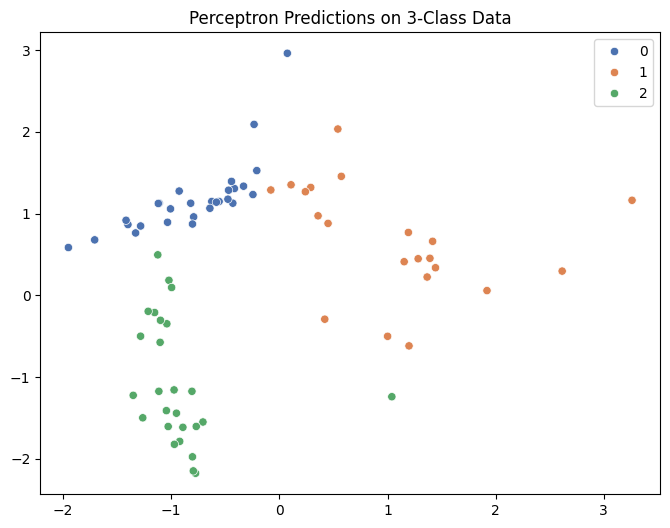

In [ ]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a 3-class dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Initialize Perceptron model
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot decision regions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette="deep")
plt.title("Perceptron Predictions on 3-Class Data")
plt.show()


### Perceptron on Real-World Dataset: Wine Classification

To put Perceptron to the test, we’ll use the classic **Wine dataset**:
- **Samples**: 178
- **Features**: 13 chemical analysis attributes
- **Classes**: 3 types of wine

We will:
1. Load the dataset
2. Train a Perceptron classifier
3. Evaluate its accuracy


In [ ]:
from sklearn.datasets import load_wine
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [ ]:
# Feature scaling (very important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train perceptron
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Heart Failure Predictions

We'll use the **Heart Disease Dataset** from Kaggle/UCI (age, cholesterol, blood pressure, etc.) to predict presence of heart disease (binary classification).

We will:
1. Load and preprocess the dataset
2. Train a scikit-learn `Perceptron` (step activation)
3. Train a Keras Perceptron (sigmoid activation)
4. Compare performance and decision boundaries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = 'https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/refs/heads/master/heart.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Features and target
X = df.drop('target', axis=1).values
y = df['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Definition: Single-Layer Perceptron

We’ll build a simple neural model in Keras:

- **Input layer**: 13 features
- **Dense layer**: 1 neuron with **sigmoid activation** to output a probability
- **Loss**: binary crossentropy
- **Optimizer**: SGD (with learning rate = 0.1)


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=50, batch_size=16)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8442 - loss: 0.3463 - val_accuracy: 0.8776 - val_loss: 0.2901
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8407 - loss: 0.3981 - val_accuracy: 0.8776 - val_loss: 0.2969
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8330 - loss: 0.3385 - val_accuracy: 0.8776 - val_loss: 0.3025
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8543 - loss: 0.3654 - val_accuracy: 0.8776 - val_loss: 0.3018
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.3624 - val_accuracy: 0.8776 - val_loss: 0.3011
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7912 - loss: 0.4257 - val_accuracy: 0.8980 - val_loss: 0.3025
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8197 - loss: 0.3728 - val_accuracy: 0.8980 - val_loss: 0.3060
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8097 - loss: 0.3938 - val_accuracy: 0.8776 - v

In [ ]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}\n")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8064 - loss: 0.4448
Test Accuracy: 0.8033



In [ ]:
# Predictions
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob >= 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
# Metrics
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7917    0.6786    0.7308        28
           1     0.7568    0.8485    0.8000        33

    accuracy                         0.7705        61
   macro avg     0.7742    0.7635    0.7654        61
weighted avg     0.7728    0.7705    0.7682        61



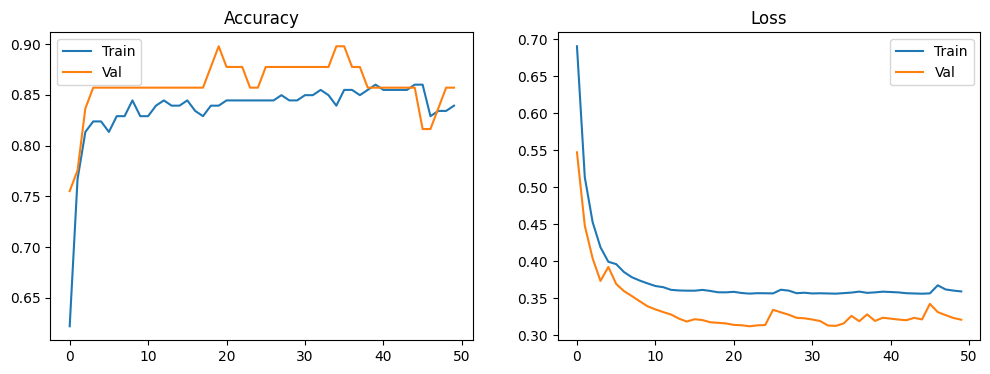

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.show()
